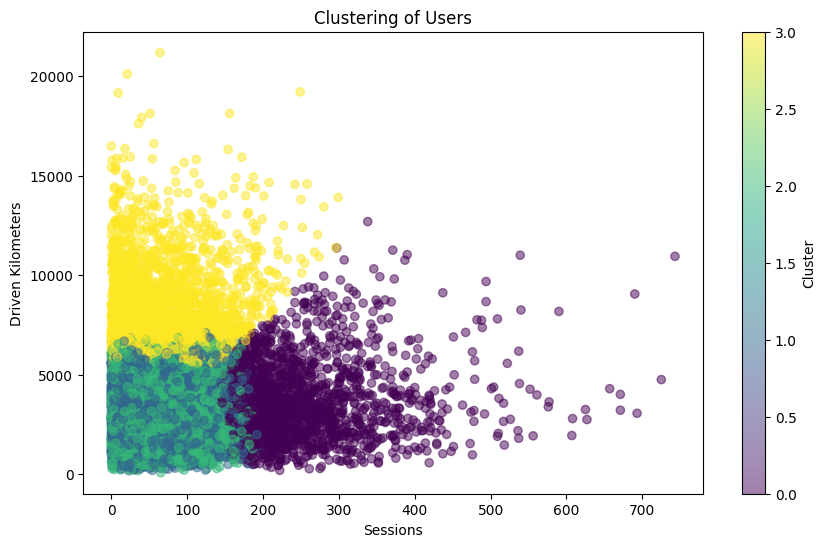

In [6]:
# ANALISIS DE DATOS DE USUARIOS DE UNA APLICACION DE TRAFICO
# Clustering de usuarios de una aplicación de tráfico
# El objetivo de este script es realizar un análisis de clustering de los usuarios de una aplicación de tráfico, 
#con el fin de identificar diferentes perfiles de usuarios. Para ello, se utilizará el algoritmo K-Means, 
#que es uno de los algoritmos de clustering más utilizados en Machine Learning.
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carga de datos
data = pd.read_csv('waze_app_dataset.csv')

# Selección de columnas relevantes para el clustering
features = data[['sessions', 'driven_km_drives', 'activity_days']]

# Limpieza de datos: eliminar posibles valores nulos
features = features.dropna()

# Normalización de los datos
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Aplicación del algoritmo K-Means
kmeans = KMeans(n_clusters=4, random_state=0)  # Puedes ajustar el número de clusters
clusters = kmeans.fit_predict(features_normalized)

# Agregar la asignación de clusters al dataframe original para análisis posterior
data['Cluster'] = clusters

# Visualización de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['sessions'], data['driven_km_drives'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Sessions')
plt.ylabel('Driven Kilometers')
plt.title('Clustering of Users')
plt.colorbar(label='Cluster')
plt.show()


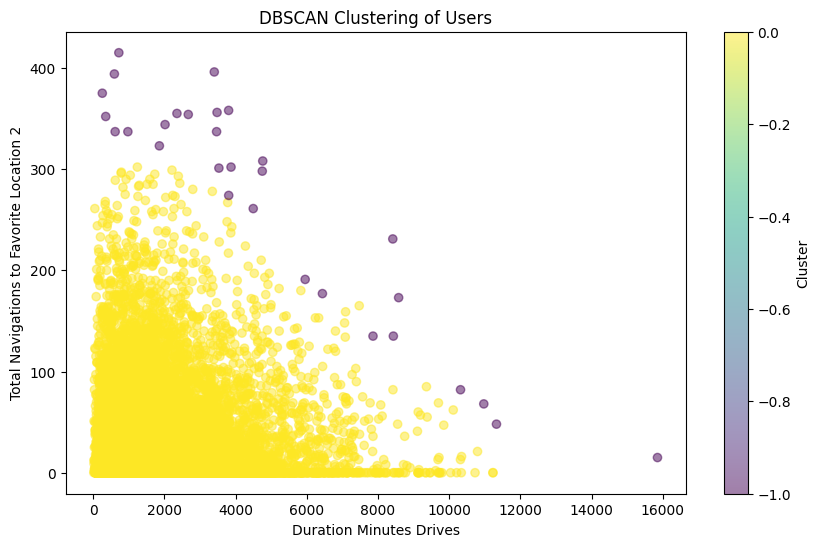

In [8]:
# Clustering de usuarios de una aplicación de tráfico con DBSCAN
# En este script, se realizará un análisis de clustering de los usuarios de una aplicación de tráfico utilizando el algoritmo DBSCAN.
# DBSCAN es un algoritmo de clustering que no requiere especificar el número de clusters de antemano,
# lo cual puede ser útil cuando no se conoce el número de clusters a priori.
# Se aplicará DBSCAN a los datos de los usuarios de la aplicación de tráfico para identificar diferentes grupos de usuarios.

import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carga de datos
data = pd.read_csv('waze_app_dataset.csv')

# Selección de columnas relevantes para el clustering
features = data[['duration_minutes_drives', 'total_navigations_fav2']]

# Limpieza de datos: eliminar posibles valores nulos
features = features.dropna()

# Normalización de los datos
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Aplicación del clustering DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps y min_samples pueden ajustarse según la necesidad
clusters = dbscan.fit_predict(features_normalized)

# Agregar la asignación de clusters al dataframe original para análisis posterior
data['Cluster'] = clusters

# Visualización de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['duration_minutes_drives'], data['total_navigations_fav2'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Duration Minutes Drives')
plt.ylabel('Total Navigations to Favorite Location 2')
plt.title('DBSCAN Clustering of Users')
plt.colorbar(label='Cluster')
plt.show()
